<a href="https://colab.research.google.com/github/SurajSP99/Appliances_Energy_prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries -->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset -->

df=pd.read_csv('/content/drive/MyDrive/Alma Better/Copy of data_application_energy.csv')
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [3]:
# Lets unhide the hidden columns in between -->

pd.set_option('display.max_columns', 1000)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## **Lets Explore the Dataset Features :**

1. **Date** - Date & Time of logging of sensor data in                          YYYY-MM-DD-HOUR-MINUTE-SECOND format.
2. **Appliance** - Total energy used by appliances in Wh (Watt Hours). It is a dependent variable.
3. **Lights** - Energy used by light fixtures in house (in Wh)
4. **T1 & RH1** - Temperature & Relative Humidity in **kitchen area** in deg. celcius & % respectively.
5. **T2 & RH2** - Temperature & Relative Humidity in **living room** area in deg. celcius & % respectively.
6. **T3 & RH3** - Temperature & Relative Humidity in **laundry room** area in deg. celcius & % respectively.
7. **T4 & RH4** - Temperature & Relative Humidity in **office** area in deg. celcius & % respectively.
8. **T5 & RH5** - Temperature & Relative Humidity in **bathroom** in deg. celcius & % respectively.
9. **T6 & RH6** - Temperature & Relative Humidity **outside the house** in deg. celcius & % respectively.
10. **T7 & RH7** - Temperature & Relative Humidity in **ironing room** in deg. celcius & % respectively.
11. **T8 & RH8** - Temperature & Relative Humidity in **teenager room 2** in deg. celcius & % respectively.
12. **T9 & RH9** - Temperature & Relative Humidity in **parent's room** in deg. celcius & % respectively.
13. **T_out** - Temperature outside in deg. celcius (from Chievres weather station)
14. **Press_mm_hg** - Pressure in mm of Hg (from Chievres weather station)
15. **RH_out** - Relative humidity outside in % (from Chievres weather station)
16. **Windspeed** - Wind speed in m/s (from Chievres weather station)
17. **Visibility** - Visibility in km (from Chievres weather station)
18. **Tdewpoint** - Dew point temperature in deg. celcius
19. **rv1** - Random variable 1
20. **rv2** - Random variable 2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Great! Our data set is not having null values in any of the column.

In [5]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

Since most of the values from 'lights' column are zero, we can drop this column.

In [6]:
df.drop('lights', axis=1, inplace = True)

In [7]:
# Converting the date column into date-time format & checking whether the day was weekday or weekend
# This will add value to the model as weekday & weekend energy usage can have large difference because human presence

df['WEEKDAY'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype('int') # 0 for weekday & 1 for weekend

df['WEEKDAY'].value_counts() 

0    14263
1     5472
Name: WEEKDAY, dtype: int64

Total 5472 recordings are taken on weekend.

In [8]:
# Now let's split the dependent & independent variables 

Temps = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
Humidities = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
Weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg", "Windspeed","Visibility"]
Random = ['rv1', 'rv2']
Other = ['WEEKDAY']
Target = df['Appliances']

Features = df[Temps + Humidities + Weather + Random + Other]



In [9]:
Features.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2,WEEKDAY
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834,24.988033,24.988033,0.277274
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719,14.496634,14.496634,0.447664
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.005322,0.005322,0.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000,12.497889,12.497889,0.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000,24.897653,24.897653,0.000000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000,37.583769,37.583769,1.000000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,49.996530,49.996530,1.000000


## Temperature is varying from -6 to 30 deg. celius.

## Humidity is varying from 1 to 100 %

## Windspeed is varying from 0 to 14 m/s

## Visibility is varying from 1 to 66 km

## Appliance Energy Usage from 10 to 1080 Wh

We can see that features have wide range of values, that is why Target variable is also having wide range of values

## **DATA VISUALIZATION**

Let's check distribution of each feature on Histogram Plot

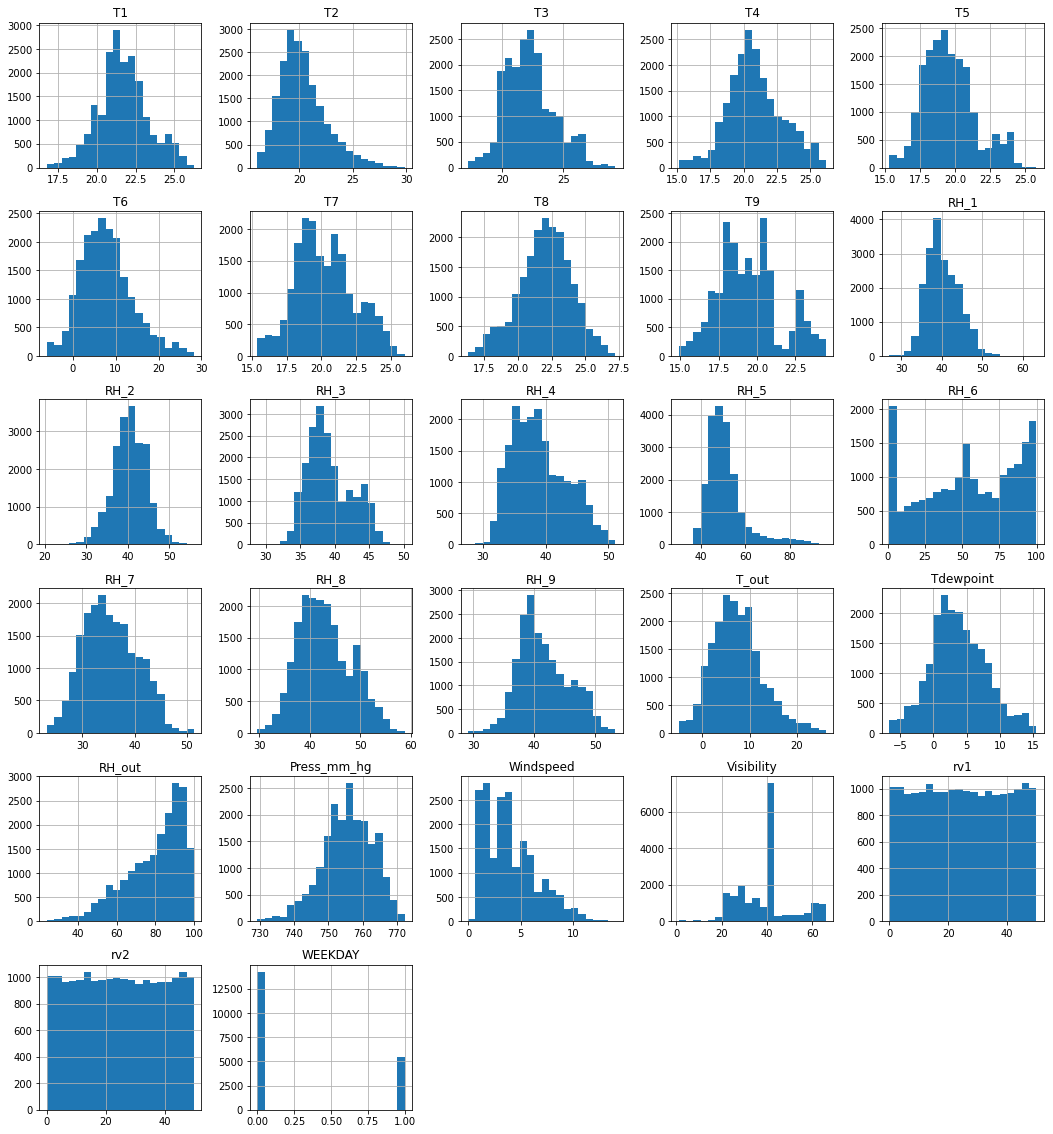

In [10]:
Features.hist(bins = 20 , figsize= (18,20)) ;

Almost all temperatures are normally distributed.

All Relative Humidities except RH_6 & RH_out are also normally distributed.

Windspeed is positively skewed.


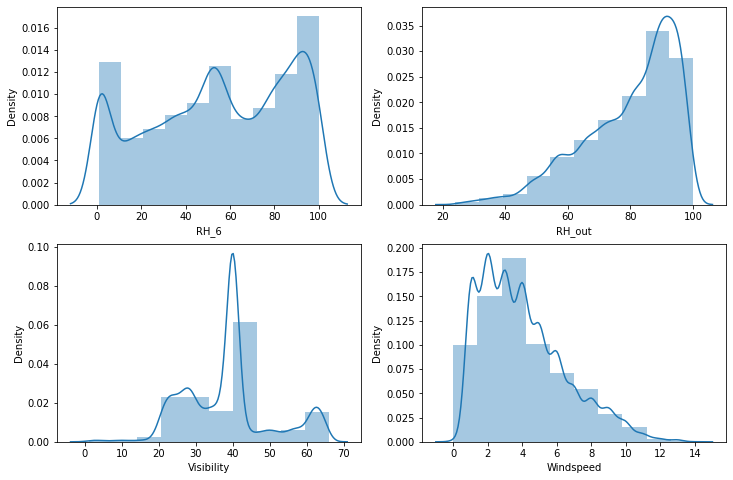

In [11]:
# Let's look into features that are not normally distributed

f, ax = plt.subplots(2,2,figsize=(12,8))
sns.distplot(Features["RH_6"],bins=10, ax= ax[0][0])
sns.distplot(Features["RH_out"],bins=10, ax=ax[0][1])
sns.distplot(Features["Visibility"],bins=10, ax=ax[1][0])
sns.distplot(Features["Windspeed"],bins=10, ax=ax[1][1])

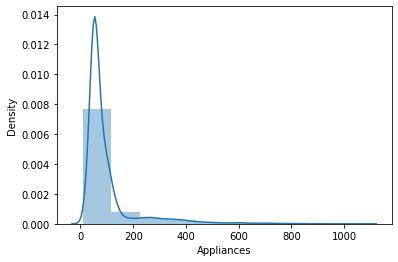

In [12]:
# Distribution of Target Variable

sns.distplot(Target,bins=10)

Target variable is having most of the values around 100 Wh & it is positively skewed.

So we will apply log transformation to our target variable to convert the distribution into more like Normal Distribution.

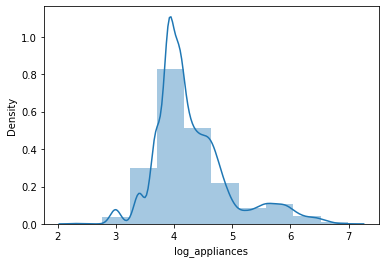

In [13]:
# Applying log transformation -->

df['log_appliances'] = np.log(df.Appliances)
sns.distplot(df['log_appliances'],bins=10)

In [14]:
Target_var = df['log_appliances']

In [15]:
df.head()

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,WEEKDAY,log_appliances
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,4.094345
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,4.094345
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,3.912023
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,3.912023
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,4.094345


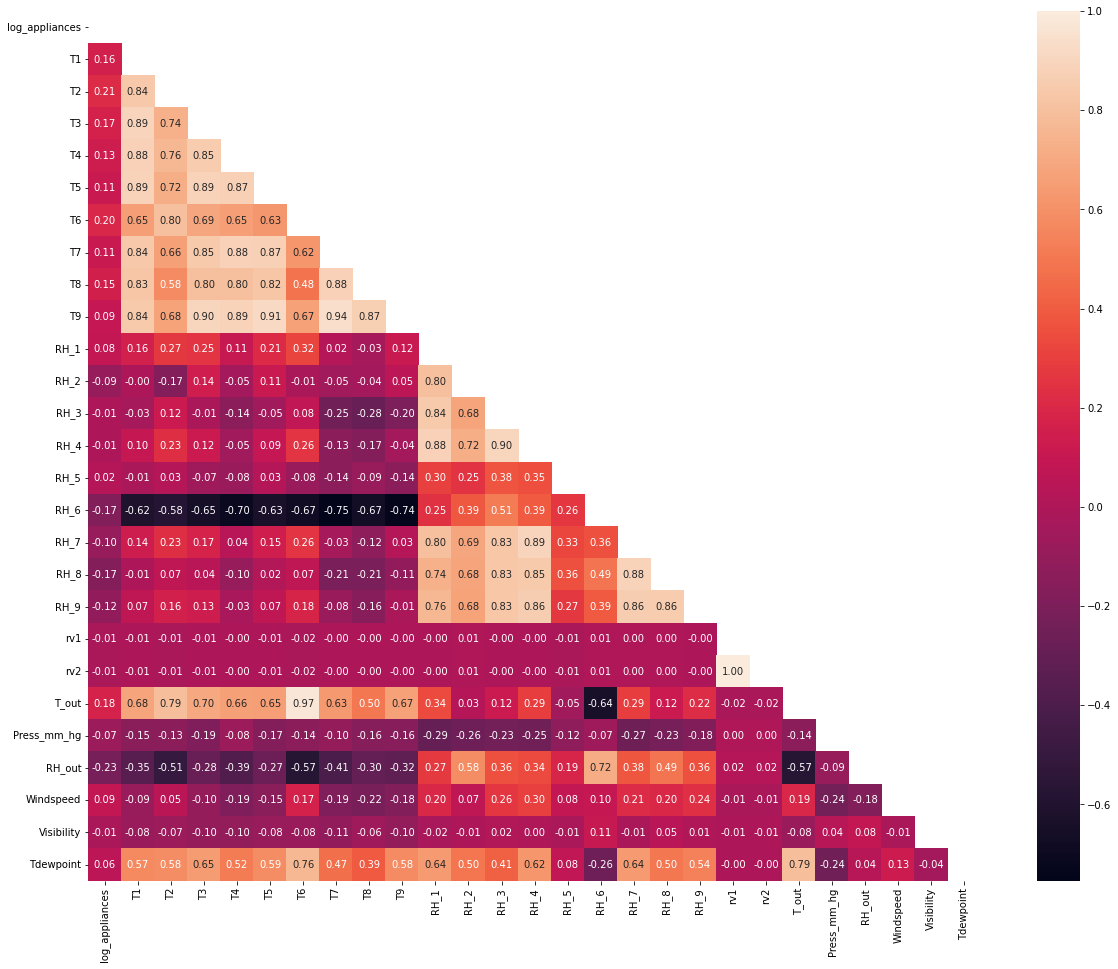

In [16]:
# Checking for the correlations between features
col = ['log_appliances', 'T1',  'T2',  'T3',  'T4','T5',  'T6',  'T7',  'T8',  'T9', 
       'RH_1', 'RH_2', 'RH_3' , 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'rv1', 'rv2',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility','Tdewpoint']
plt.figure(figsize = (20,16))
corr = df[col].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, fmt = '.2f', annot = True)

### T3, T5 & T7 are highly correlated with T9
 - We can drop T9 as many features are having high correlation with it & we can the same information from other features.

### T6 and T_out have very high degree of correlation
 - As both the features are showing outside temperature, so we can drop one feature. I am droping T6

### T1 is also having high correlation with all other temperatures except T_out

### RH3 & RH4 are highly correlated
 - We will drop RH3, since its also correlated with other features.

### No features have high negative degree of correlation.

### Features from weather station are not having much correlation.

### rv1, rv2 & Visibilty have no any correlation with target variable, hence we will drop them.

In [17]:
# Dropping the features based on above conclusion.

df.drop(['T9', 'T6', 'RH_3', 'rv1', 'rv2', 'Visibility'], axis = 1 , inplace = True)
df.head()

,date,Appliances,T1,RH_1,T2,RH_2,T3,T4,RH_4,T5,RH_5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,WEEKDAY,log_appliances
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,19.000000,45.566667,17.166667,55.20,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000,5.3,0,4.094345
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,19.000000,45.992500,17.166667,55.20,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667,5.2,0,4.094345
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,18.926667,45.890000,17.166667,55.09,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,6.333333,5.1,0,3.912023
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,18.890000,45.723333,17.166667,55.09,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.8,92.0,6.000000,5.0,0,3.912023
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,18.890000,45.530000,17.200000,55.09,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.9,92.0,5.666667,4.9,0,4.094345


##Data Preprocessing

In [18]:
# Splitting the data into Train & Test set

from sklearn.model_selection import train_test_split

X = df.drop(['Appliances', 'date', 'log_appliances'], axis = 1)

Y = Target_var # log_appliances

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [19]:
# Checking the shape of train dataset
print(X_train.shape,Y_train.shape)

# Checking the shape of test dataset
print(X_test.shape, Y_test.shape)

(14801, 21) (14801,)
(4934, 21) (4934,)


## Model Training

We will be training following models on our Dataset

 - Ridge
 - Lasso
 - Random Forest Regressor
 - Gradient Boosting Regressor
 - XGBoost Regressor


In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [21]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
         ]

In [22]:
# Running all the models in for loop & storing the result for each.
import time 
from math import sqrt
from sklearn.metrics import mean_squared_error

all_model_data = []
for name,model in models :
    model_data = {}
    model.random_state = 1
    model_data["Name"] = name
    start = time.time()
    model.fit(X_train, Y_train)
    end = time.time()
    model_data["Train_Time"] = round((end - start), 4) # Calculating time taken by model to train
    model_data["Train_R2_Score"] = round(metrics.r2_score(Y_train,model.predict(X_train)), 4)
    model_data["Test_R2_Score"] = round(metrics.r2_score(Y_test,model.predict(X_test)), 4)
    model_data["Test_RMSE_Score"] = round(sqrt(mean_squared_error(Y_test,model.predict(X_test))),4)
    #model_data["model_var"] = mod
    all_model_data.append(model_data)

[13:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
all_model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.0168,
  'Train_R2_Score': 0.0379,
  'Test_R2_Score': 0.0391,
  'Test_RMSE_Score': 0.655},
 {'Name': 'Ridge: ',
  'Train_Time': 0.012,
  'Train_R2_Score': 0.2232,
  'Test_R2_Score': 0.2322,
  'Test_RMSE_Score': 0.5855},
 {'Name': 'RandomForest ',
  'Train_Time': 25.6375,
  'Train_R2_Score': 0.9586,
  'Test_R2_Score': 0.7129,
  'Test_RMSE_Score': 0.358},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 7.5876,
  'Train_R2_Score': 0.4038,
  'Test_R2_Score': 0.3575,
  'Test_RMSE_Score': 0.5356},
 {'Name': 'XGBRegressor: ',
  'Train_Time': 1.5455,
  'Train_R2_Score': 0.3988,
  'Test_R2_Score': 0.352,
  'Test_RMSE_Score': 0.5379}]

In [24]:
# Creating a DataFrame for better comparison

model_data_df = pd.DataFrame(all_model_data,  columns=['Name', 'Train_Time', 'Train_R2_Score', 'Test_R2_Score','Test_RMSE_Score'])
model_data_df.head().sort_values(by = 'Test_R2_Score', ascending = False) # Descending arrangement

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
2,RandomForest,25.6375,0.9586,0.7129,0.3580
3,GradientBoostingClassifier:,7.5876,0.4038,0.3575,0.5356
4,XGBRegressor:,1.5455,0.3988,0.3520,0.5379
1,Ridge:,0.0120,0.2232,0.2322,0.5855
0,Lasso:,0.0168,0.0379,0.0391,0.6550


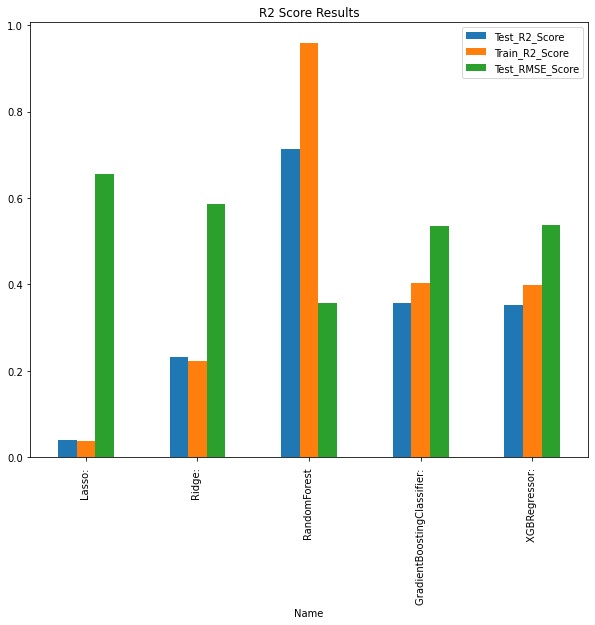

In [25]:
model_data_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

## We can see that Random Forest is giving highest Test R2 Score & lowest Test RMSE Score. 

## So Random Forest Model is giving best performance with non tuned parameters and Lasso Regularized Linear Regression model is performing worst.

## Now we will again run these models after Hyperparameter Tuning & Cross Validation

In [26]:
# Number of trees
n_estimators = [100, 150, 200]

# Maximum depth of trees
max_depth = [20, 40, 60]

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split
             }

In [27]:
from sklearn.model_selection import GridSearchCV

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  18.5s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  18.5s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  18.6s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  18.7s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  18.5s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  28.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  28.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  27.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  27.7s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  27.6s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  36.7s
[CV] END max_depth=20, min_samples_split=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40, 60],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2', verbose=2)

In [28]:
rf_grid.best_params_

{'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 150}

In [29]:
rf_grid.best_estimator_.score(X_train, Y_train)

0.9593292861685476

In [30]:
rf_grid.best_estimator_.score(X_test, Y_test)

0.7148264610040116

In [31]:
np.sqrt(mean_squared_error(Y_test, rf_grid.best_estimator_.predict(X_test)))

0.35684659063946245

After trying multiple combinations of Hyperparameters and 5 fold cross validation, we got to know that Random Forest regressor with max_depth = 40, min_sample_split = 2, & n_estimators = 150 is the best performer.

Random Forest Regressor with default parameters was giving Train R2 score as 0.9586 & Test R2 score as 0.7129

Random Forest Regressor with tuned hyperparameters gives Train R2 score as 0.9593 and Test R2 score as 0.7148 which is slightly better than model with default parameters.

# Feature Importance

In [32]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(rf_grid.best_estimator_.feature_importances_)

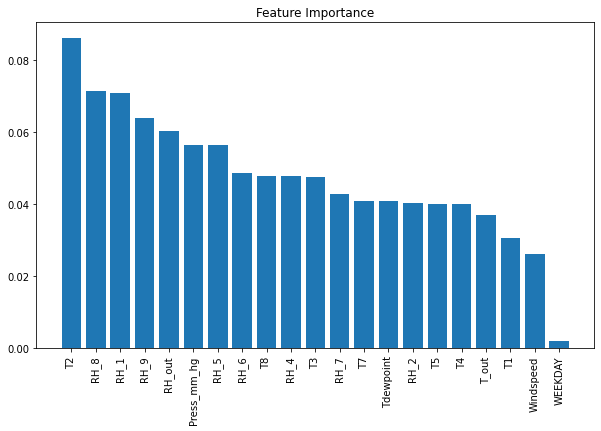

In [33]:
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

#Top 5 features are :

1. **T2** - Temperature in living room.
2. **RH_8** - Relative Humidity in Teenager Room
3. **RH_1** - Relative Humidity in Kitchen Area
4. **RH_9** - Relative Humidity in Parent's Room
5. **RH_out** - Outside Relative Humidity

#Conclusion
1. Random Forest Regressor has performed best for given data set.
2. It was able to explain 71.29 % variation in test set.
3. After Hyperparameter tuning, Random Forest Regressor was able to explain 71.48 % variation in test set.
4. Best parameters for Random Forest Regressor are:

  max_depth: 40 

  min_samples_split: 2

  n_estimators: 150
5. Final model has 21 features.